# *
# **
# experiance
# **
# *

In [29]:
import pandas as pd

data = pd.read_csv('../dataset_version_4/Experiance_dataset_high_1800p.csv')
data.head()

,Label,NodeID,Recente,Ancienne,periode
0,0.0,s1_f1,NaN,0.5,1
1,1.0,s1_f2,NaN,0.5,1
2,0.0,s1_h1,NaN,0.5,1
3,0.2,s1_h2,NaN,0.5,1
4,1.0,s2_f1,NaN,0.5,1


In [30]:
data['label_experience'] = 0.5
data.head()

,Label,NodeID,Recente,Ancienne,periode,label_experience
0,0.0,s1_f1,NaN,0.5,1,0.5
1,1.0,s1_f2,NaN,0.5,1,0.5
2,0.0,s1_h1,NaN,0.5,1,0.5
3,0.2,s1_h2,NaN,0.5,1,0.5
4,1.0,s2_f1,NaN,0.5,1,0.5


In [31]:
# Function to calculate label experience correctly
def calculate_label_experience(df):
    nodes = df['NodeID'].unique()
    periodes = sorted(df['periode'].unique())  # Ensure periods are in order
    for node in nodes:
        for periode in periodes:
            if periode != 1:
                # Get the last Label value and xp for the node for the period just before the current one
                node_data = df[df['NodeID'] == node]
                previous_knwoledge = node_data[node_data['periode'] == (periode - 1)]['Label'].values     #recent
                previous_experiance = node_data[node_data['periode'] == (periode - 1)]['label_experience'].values    #old
                
                final_experience = 0.4 * previous_knwoledge + 0.6 * previous_experiance
                df.loc[(df['NodeID'] == node) & (df['periode'] == periode), 'label_experience'] = final_experience
    return df


# Apply the revised function to calculate the label experience for each node
data = calculate_label_experience(data)

In [32]:
data.dropna(inplace=True)
data.to_csv('../dataset_version_4/saved_experiance_high_1800p.csv', index=False)

#data.drop(columns=["Label"], inplace=True)
data[data['NodeID'] == 's1_h1']

,Label,NodeID,Recente,Ancienne,periode,label_experience
42,1.0,s1_h1,0.000000,0.500000,2,0.300000
82,0.0,s1_h1,0.998899,0.290382,3,0.580000
122,1.0,s1_h1,0.000000,0.587418,4,0.348000
162,1.0,s1_h1,1.000000,0.341151,5,0.608800
202,0.0,s1_h1,1.000000,0.617364,6,0.765280
...,...,...,...,...,...,...
71802,1.0,s1_h1,1.000000,0.362911,1796,0.567551
71842,0.4,s1_h1,1.000000,0.630001,1797,0.740531
71882,0.6,s1_h1,0.195503,0.785118,1798,0.604318
71922,0.0,s1_h1,0.702472,0.537930,1799,0.602591


In [33]:
X = data[['Recente', 'Ancienne']]
Y = data['label_experience']

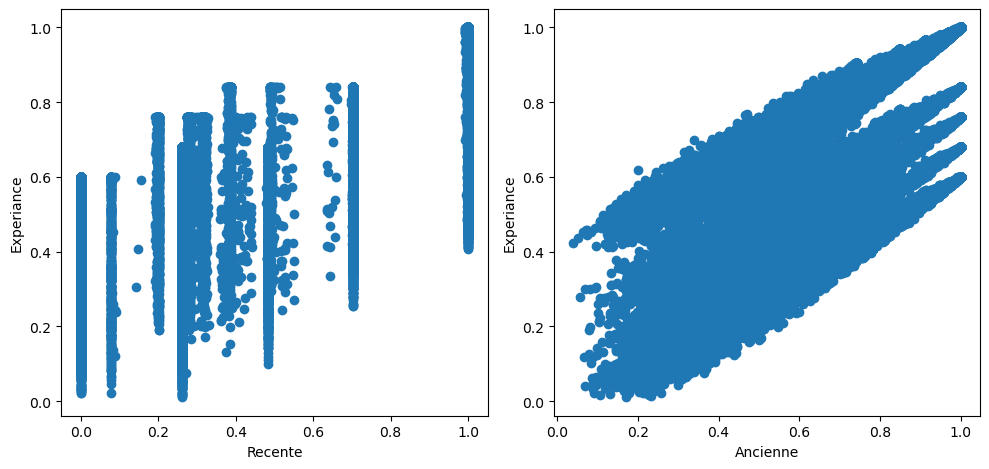

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjusted figure size for better spacing

plt.subplot(1, 2, 1)
plt.scatter(X['Recente'], Y)
plt.xlabel('Recente')
plt.ylabel('Experiance') 

plt.subplot(1, 2, 2)
plt.scatter(X['Ancienne'], Y)
plt.xlabel('Ancienne')
plt.ylabel('Experiance')
    
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplots to fit in the figure area
plt.show()  # Show the current figure
plt.clf()  # Clear the figure to prepare for the next plot

# **
# ***
# Trust final
# **
# *

In [35]:
import pandas as pd

data = pd.read_csv('../dataset_version_4/trust_dataset_high_1800p.csv')

In [36]:
data.head()

,Label,NodeID,knowledge,experiance,periode
0,0.0,s1_f1,0.000000,0.5,1
1,1.0,s1_f2,0.995412,0.5,1
2,0.0,s1_h1,0.000000,0.5,1
3,0.2,s1_h2,0.481032,0.5,1
4,1.0,s2_f1,0.996330,0.5,1


In [37]:
data['label_experience'] = 0.5

In [38]:
# Function to calculate label experience correctly
def calculate_label_experience(df):
    nodes = df['NodeID'].unique()
    periodes = sorted(df['periode'].unique())  # Ensure periods are in order
    for node in nodes:
        for periode in periodes:
            if periode != 1:
                # Get the last Label value and xp for the node for the period just before the current one
                node_data = df[df['NodeID'] == node]
                previous_knwoledge = node_data[node_data['periode'] == (periode - 1)]['Label'].values     #recent
                previous_experiance = node_data[node_data['periode'] == (periode - 1)]['label_experience'].values    #old
                
                final_experience = 0.4 * previous_knwoledge + 0.6 * previous_experiance
                df.loc[(df['NodeID'] == node) & (df['periode'] == periode), 'label_experience'] = final_experience
    return df


# Apply the revised function to calculate the label experience for each node
data = calculate_label_experience(data)

In [39]:
# Function to calculate label experience correctly
def calculate_label_experience(df):
    
    df['Label_final'] = 0.75 * df['Label'] + 0.25 * df['label_experience']
    return df

data = calculate_label_experience(data)

In [40]:
data.to_csv('../dataset_version_4/saved_trust_high_1800p.csv', index=False)
data[data['NodeID'] == 's1_h1']

,Label,NodeID,knowledge,experiance,periode,label_experience,Label_final
2,0.0,s1_h1,0.000000,0.500000,1,0.500000,0.125000
42,1.0,s1_h1,0.998899,0.290382,2,0.300000,0.825000
82,0.0,s1_h1,0.000000,0.587418,3,0.580000,0.145000
122,1.0,s1_h1,1.000000,0.341151,4,0.348000,0.837000
162,1.0,s1_h1,1.000000,0.617364,5,0.608800,0.902200
...,...,...,...,...,...,...,...
71802,1.0,s1_h1,1.000000,0.630001,1796,0.567551,0.891888
71842,0.4,s1_h1,0.195503,0.785118,1797,0.740531,0.485133
71882,0.6,s1_h1,0.702472,0.537930,1798,0.604318,0.601080
71922,0.0,s1_h1,0.261524,0.606912,1799,0.602591,0.150648


In [41]:
print(f"1 - Dataset size : {data.shape}\n\n")
print(f"2 - La distribution du label :\n{data['Label_final'].value_counts(normalize= True)}\n\n")
print(f"3 - La moyenne du label est : {data['Label_final'].mean()}")

1 - Dataset size : (72000, 7)


2 - La distribution du label :
Label_final
1.000000    0.017875
1.000000    0.001069
1.000000    0.000861
1.000000    0.000625
1.000000    0.000583
              ...   
0.960000    0.000014
0.999953    0.000014
0.870033    0.000014
1.000000    0.000014
0.998388    0.000014
Name: proportion, Length: 66119, dtype: float64


3 - La moyenne du label est : 0.8409847085411303


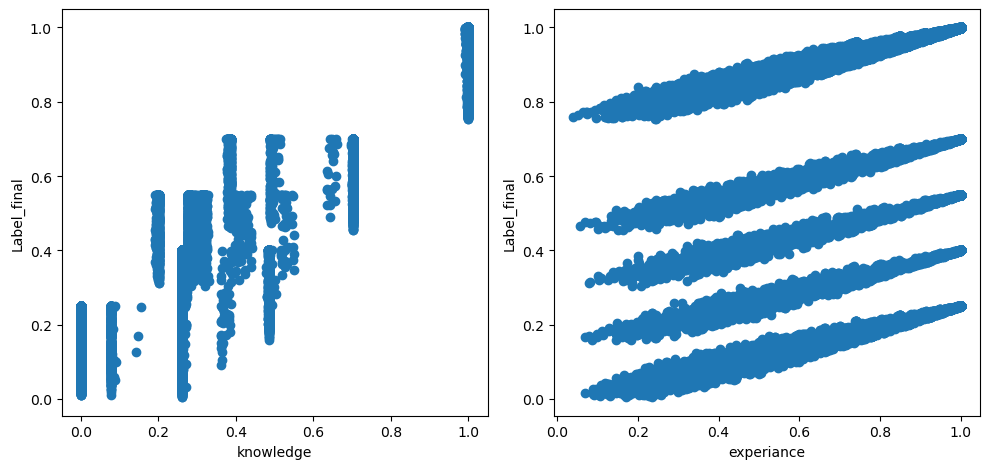

In [42]:
X = data[['knowledge', 'experiance']]
Y = data['Label_final']
    
plt.figure(figsize=(10, 5))  # Création d'une figure

plt.subplot(1, 2, 1)
plt.scatter(X['knowledge'], Y)
plt.xlabel('knowledge')
plt.ylabel('Label_final')

plt.subplot(1, 2, 2)
plt.scatter(X['experiance'], Y)
plt.xlabel('experiance')
plt.ylabel('Label_final')
    
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuster les sous-graphiques pour éviter le chevauchement
plt.show()  # Afficher le graphique
plt.close()  # Fermer la figure pour éviter les chevauchements futurs